In [1]:
!pip install tiled[all]

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 51.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.1/796.1 kB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.1/648.1 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 97.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/15

In [17]:
from tiled.client import from_uri
import matplotlib.pyplot as plt

In [3]:
c = from_uri("http://tld:8000")

In [5]:
run = c[list(c.keys())[-1]]

In [6]:
arr = run['primary']['data'].read()

In [25]:
arr.keys()

KeysView(<xarray.Dataset> Size: 42kB
Dimensions:                   (time: 4, dim_0: 3, dim_1: 6, dim_2: 2, dim_3: 650)
Coordinates:
  * time                      (time) float64 32B 1.719e+09 ... 1.719e+09
Dimensions without coordinates: dim_0, dim_1, dim_2, dim_3
Data variables:
    wafer_measurement_edx     (time, dim_0) float64 96B 0.6525 0.1942 ... 0.226
    wafer_measurement_phases  (time, dim_1) float64 192B 0.0 0.0 ... 0.02042
    wafer_measurement_ioq     (time, dim_2, dim_3) float64 42kB 15.0 ... 0.00...
    wafer_x                   (time) float64 32B -1.0 -0.3333 0.3333 1.0
Attributes:
    stream_name:  primary)

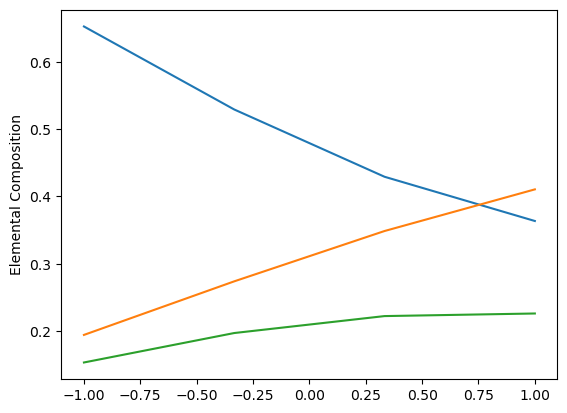

In [29]:
plt.figure()
plt.plot(arr['wafer_x'], arr['wafer_measurement_edx'])
plt.ylabel("Elemental Composition")
plt.show()

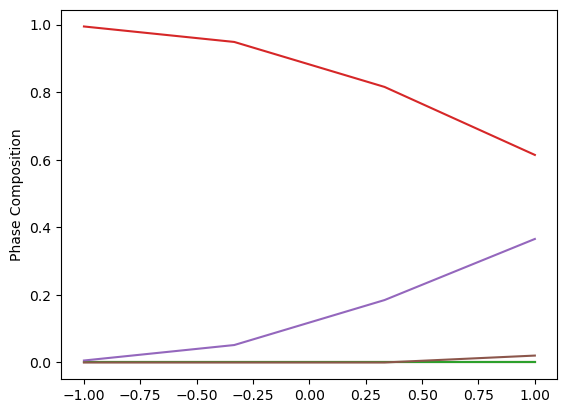

In [30]:
plt.figure()
plt.plot(arr['wafer_x'], arr['wafer_measurement_phases'])
plt.ylabel("Phase Composition")
plt.show()

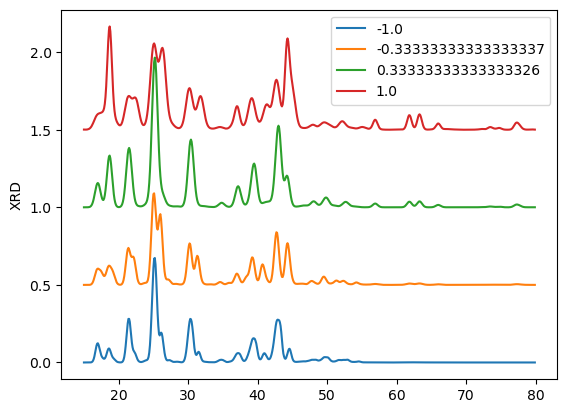

In [42]:
plt.figure()
for i, (x, (q, ioq)) in enumerate(zip(arr['wafer_x'],arr['wafer_measurement_ioq'])):
    plt.plot(q, ioq+i/2, label=f"{x.data}")
plt.ylabel("XRD")
plt.legend()
plt.show()